<!-- > **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation. -->

# Analysis of IMDB movie data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ol>
        <li><a href="#desct">Descriptive Statistics</a></li>
        <li><a href="#r1">Research Question 1</a></li>
        <li><a href="#r2">Research Question 2</a></li>
        <li><a href="#r3">Research Question 3</a></li>
        <li><a href="#r4">Research Question 4</a></li>
        <li><a href="#r5">Research Question 5</a></li>
   </ol>
    
<li><a href="#limit">Limitations</a></li>
    
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<!-- > @Patrick Ojunde   

> Contact   
> <a href="https://github.com/Patrick5455"> Github</a>
> <a href="https://www.linkedin.com/in/patrickojunde/"> LinkedIn</a> -->

<a id='intro'></a>
## Introduction
<!-- 
> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore. -->

##### This data set is a collection of out 10,000 movies from  The Movie Database (TMDb), including user ratings and revenue.

------------------------------------------------------------------------------
    
    

##### (Reearch Questions) 


``* `` Statistics (Descriptive)

``1 `` most popular genres (2010-2015)? 

``2 ``  properties associated with high revenue movies?

<!--  ```*```Are certain movie genres more profitable than the other ?
 -->
``3 `` correlation between movie's budget and revenue?

``4 `` which movie genres attract more votes?

``5 ``Correlation between revenue and vote count?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr as pr

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

<!-- > **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.
 -->
### General Properties

In [2]:
data = '../datasets/tmdb-movies.csv'

In [3]:
df_main = pd.read_csv(data)
df_main.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


.

##### let's set our id column as our index. 

In [4]:
df_main.set_index('id', inplace=True)

In [5]:
df_main.head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


.

####  some columns are not necessary in helping us to answer our research questions. So they would be dropped

#####  columns ending with _adj are not needed. 
##### According to info privided on the site where the data ws collected, these columns contsin value of the budget and revenue dollars in 2010 accounting for inflation over time which are not needed in answering our research questions

In [6]:
df_main.drop(['budget_adj',	'revenue_adj'], axis=1, inplace= True)

In [7]:
df_main.head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


.

##### columns such as  'homepage' , 'overview' and 'tagline; are alos not suited for our analysis or answering our research questions
#####  'overview' and 'tagline; columns are qualitative data our analysis is focused on answering quantitative questions
#####  we do not need columns such as 'cast', 'keywords' for our analysis as well
##### 'homepage column contains links to the movie website'

In [8]:
df_main.drop(['homepage' , 'overview','tagline', 'cast', 'keywords'], axis=1, inplace=True)

In [9]:
df_main.head(2)

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


.

#### Let's us check out our data properties to get more familiar with the data

##### Let's check the shape of our data

In [10]:
f'The data we are working withhas {df_main.shape[0]} rows and {df_main.shape[1]} columns'

'The data we are working withhas 10866 rows and 13 columns'

##### check data types of each column

In [11]:
df_main.dtypes

imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

.

##### data info

In [12]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


#### Info Report

In [13]:
f' Working  data contains:   6 object columns, 2 float columns and integer columns,'

' Working  data contains:   6 object columns, 2 float columns and integer columns,'

In [14]:
f'We would convert columns like release_year, and columns with object data type to thier appropriate datatypes  in the cleaning process'

'We would convert columns like release_year, and columns with object data type to thier appropriate datatypes  in the cleaning process'

.

#### Are there  null and duplicate values in the working data?

In [15]:
f'duplicate values? : { df_main.duplicated().any()}'

'duplicate values? : True'

In [16]:
f'What is the count of duplicate rows?:  {df_main.duplicated().sum()}'

'What is the count of duplicate rows?:  1'

##### view the duplicated row - we have just one

In [17]:
df_main[df_main.duplicated()]

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


> we should take a look at duplicated rows before making a decision

In [18]:
df_main.loc[42194]

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


In [19]:
f'We have only one duplicated row whcih would be dropped during cleaning. Dropping the duplicated row does not adversely affect our data'  

'We have only one duplicated row whcih would be dropped during cleaning. Dropping the duplicated row does not adversely affect our data'

.

#### check for null values in our datasets

In [20]:
f'null values : {df_main.isnull().any().any()}'

'null values : True'

#### we have null values, lets take a look at the sum of nul vallues in each column 

In [21]:
df_main.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

> from the above, we can observe that columns containing null values are columns with categorical values which are  joined by | 

In [22]:
df_main[['imdb_id', 'director', 'genres', 'production_companies']]

,imdb_id,director,genres,production_companies
id,,,,
135397,tt0369610,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...
76341,tt1392190,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...
262500,tt2908446,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...
140607,tt2488496,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot
168259,tt2820852,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...
...,...,...,...,...
21,tt0060371,Bruce Brown,Documentary,Bruce Brown Films
20379,tt0060472,John Frankenheimer,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...
39768,tt0060161,Eldar Ryazanov,Mystery|Comedy,Mosfilm


 #### These columns do not pose any significant threat to our analysis becuase they are not data of quantitiave values' )

### Features of the working data and what they mean
> NB: I followed the dataset order

imdb_id -- id for each movies from the database

popularity -- how much visitation a movie title’s page has attracted in  a year

budget -- budgeted cost for movie production

revenue -- income generated from the sale of a movie

director -- movie director

runtime -- lenght of movie (measured in minutes)

genres -- the literary genre the movie belngs to 

production_companies -- the company(s) that produced a particular movie 

release_date -- public viewing release date

vote_count -- movie's rating

vote_average -- average of vote counts

release_year --  the year he movie was released for public viewing 

.

<!-- > **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s). -->

### Data Cleaning 

### (To-do's:)

> 1. drop duplicate rows,

>  2. In genres column, explode  strings separated by | to new rows in the dataframe: this is to ensure we are able to group our data by genres

>  3.  convert object columns e.g. release year to  appropriate datatypes,

<!-- #### *convert some object columns lke release year to thier appropriate datatypes,* -->

#### let's treat duplicate rows and null values in the working dataset

In [23]:
df_main.drop_duplicates(inplace=True)

>  Confirm there are no more duplicate rows

In [24]:
f' any duplicated row(s): {df_main.duplicated().any()} ' 

' any duplicated row(s): False '

#### Separate columns with multiple values joined by '|' in single row

> Since we are not having anything to do with production companies, we would  focus only on genres

In [25]:
df_main.head(1)

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


separate values of genre columns to a list 

> using lambda, apply string split funtion on genres column

In [26]:
df_main['genres'] = df_main['genres'].apply(lambda x: str(x).split('|'))

In [27]:
df_main.head(3)

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


#### with pandas explode funtion we can separate genre list values into new rows

>  at this stage of our cleaning process, we need to create a copy of our working dataset 

In [28]:
copy_df = df_main.copy()

In [29]:
copy_df = copy_df.explode('genres').dropna()

> take a loot at the result of the explode funtion in our dataframe

In [30]:
copy_df.head()

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


> We got what we wanted!

> NB: Let's investigate further the content of our genres columns, what do we have there?

> What values are there? Are there irregular values ?

In [31]:
copy_df.genres.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'nan', 'Foreign'], dtype=object)

> we have 'nan' values in genres column. nan values can be quite tricky to deal with. 

> we would deal with nan values and such other instance as we proceed in our cleaning pr

#### check for duplicated rows again, we do not want to risk having any

In [32]:
copy_df.duplicated().any()

False

##### drop any duplicates if any exists

In [33]:
copy_df.drop_duplicates(inplace=True)

.

#### normalization: 

##### *convert release year and realese_date columns to appropriate datatypes*


> Check data types

In [34]:
copy_df.dtypes

imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

> release_year column would not be chnaged to date type since we are not performing analysis like time-series analysis

> We would be treating it as a categorical variable for vidulaization purpose

In [35]:
copy_df.release_date = pd.to_datetime(copy_df.release_date) 

In [36]:
copy_df.release_year = copy_df.release_year.astype(str)

##### we also need to convert budget and revenue columns to float 

In [37]:
copy_df.budget = copy_df.budget.astype(float)

In [38]:
copy_df.revenue = copy_df.revenue.astype(float)

> Let check our datatyepe after conversion

In [39]:
copy_df.dtypes 

imdb_id                         object
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                    object
dtype: object

In [40]:
copy_df.head()

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


#### it is important we get more intinmate with our budget and revenue columns becuase they are at the centre of some of our research questions
>> any where budget and revenue colunns contain null or zero values, implies that there was no record 

> >`check for null and zero values and deal with such values appropriately

<!-- #### Are there movies with no revenue record or budget record or both revenue and budget record -->

In [41]:
copy_df.isnull().any()

imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
director                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
dtype: bool

> We have no null values

> check for zero values in  budget and revenue columns

In [42]:
(copy_df.loc[:, ['budget', 'revenue', ]]  == 0).any()

budget     True
revenue    True
dtype: bool

> Budget and revenue columns contain zero values !

In [43]:
zero_values = copy_df[copy_df.budget == 0].query('revenue == 0')

In [44]:
zero_values.head()

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
347096,tt3478232,2.165433,0.0,0.0,Mythica: The Darkspore,Anne K. Black,108,Action,Arrowstorm Entertainment,2015-06-24,27,5.1,2015
347096,tt3478232,2.165433,0.0,0.0,Mythica: The Darkspore,Anne K. Black,108,Adventure,Arrowstorm Entertainment,2015-06-24,27,5.1,2015
347096,tt3478232,2.165433,0.0,0.0,Mythica: The Darkspore,Anne K. Black,108,Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015
308369,tt2582496,2.141506,0.0,0.0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,Comedy,Indian Paintbrush,2015-06-12,569,7.7,2015
308369,tt2582496,2.141506,0.0,0.0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,Drama,Indian Paintbrush,2015-06-12,569,7.7,2015


### Decision questions on budget and revenue rows without record

> Should they be kept or dropped based on the objecive of our analysis?

> Chances are that the production companies refused to make public revenue and budget figures of these movies

> If we drop these rows, it might affect the result of analysis such as popularity / vote count distribution

> It is safer for us to keep them in our current dataframe

> Howver we would remove them as the need arises

##### Let's check for nan values again  in our splitted/exploded column

In [45]:
copy_df.genres.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'nan', 'Foreign'], dtype=object)

#### We have assessed , cleaned, made observations and decisions about our data

#### We now have a working dataset for analysis and to answer our research questions

.

<a id='eda'></a>
## Exploratory Data Analysis

<!-- > **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. -->


<a id='desct'></a>

### We would start with a descriptive statistics of quantitiaive values

##### NB: 
> budget and  revenue values would be denominated as dollars `$`

>  runtime values (movie length) are in `minutes`

> We start by describing the statistical properties of quanttitative features of our dataset

In [46]:
copy_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average
count,24713.000000,2.471300e+04,2.471300e+04,24713.000000,24713.000000,24713.000000
mean,0.749491,1.901475e+07,5.169041e+07,103.222191,270.715899,5.956391
std,1.149372,3.574955e+07,1.372821e+08,27.836584,662.428195,0.897372
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000
25%,0.246694,0.000000e+00,0.000000e+00,91.000000,20.000000,5.400000
50%,0.440769,1.200000e+06,1.250000e+02,100.000000,51.000000,6.000000
75%,0.834029,2.300000e+07,3.759747e+07,113.000000,196.000000,6.600000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000


>  Budget, revenue and runtime features are at the centre of our research questions. 

> Hence we need to individually check the statistical properties of these specific columns

#### Budget statistics

In [47]:
print(f'Movie with highest budget = ${copy_df.budget.max()}\n')

Movie with highest budget = $425000000.0



> We have to filter out zero values in the budget column of our working data to get the right minimum value

In [48]:
no_zero_bdgt = copy_df[copy_df.budget >0]

print(f'Movie with lowest budget =  ${no_zero_bdgt.budget.min()}\n')

Movie with lowest budget =  $1.0



>  we want to calculate the average of unique budget values

> Using unique here is necesssary becuase the exlpoded genre column has led to repeated budget and revenue figures

In [49]:
mean_bdgt = copy_df.budget.unique().mean()

print(f'Average budget =  ${mean_bdgt}')

Average budget =  $33533201.2160149


##### 

#### Reveue statistics ($)

In [50]:
print(f'Movie with highest revenue =  ${copy_df.revenue.max()}\n')

no_zero_rev = copy_df[copy_df.revenue >0]

print(f'Moviw with lowest revenue = ${no_zero_rev.revenue.min()}\n')

mean_bdgt = copy_df.revenue.mean()

print(f'Average revenue - ${mean_bdgt}')

Movie with highest revenue =  $2781505847.0

Moviw with lowest revenue = $2.0

Average revenue - $51690413.318132155


.

#### Runtime statistics (mins)

In [51]:
print(f'Movie with longest runtime =  {copy_df.runtime.max()}  mins\n')

no_zero_run = copy_df[copy_df.runtime >0]

print(f'Movie with shortest runtime =  {no_zero_run.runtime.min()}  mins\n')

mean_run = copy_df.runtime.unique().mean()

print(f'Average runtme: {mean_run}  mins')

Movie with longest runtime =  877  mins

Movie with shortest runtime =  2  mins

Average runtme: 140.24778761061947  mins


.

#### Visually plot these quantitative data as multiple histograms

> This would help us get more intimate with the properties of the quantitative data

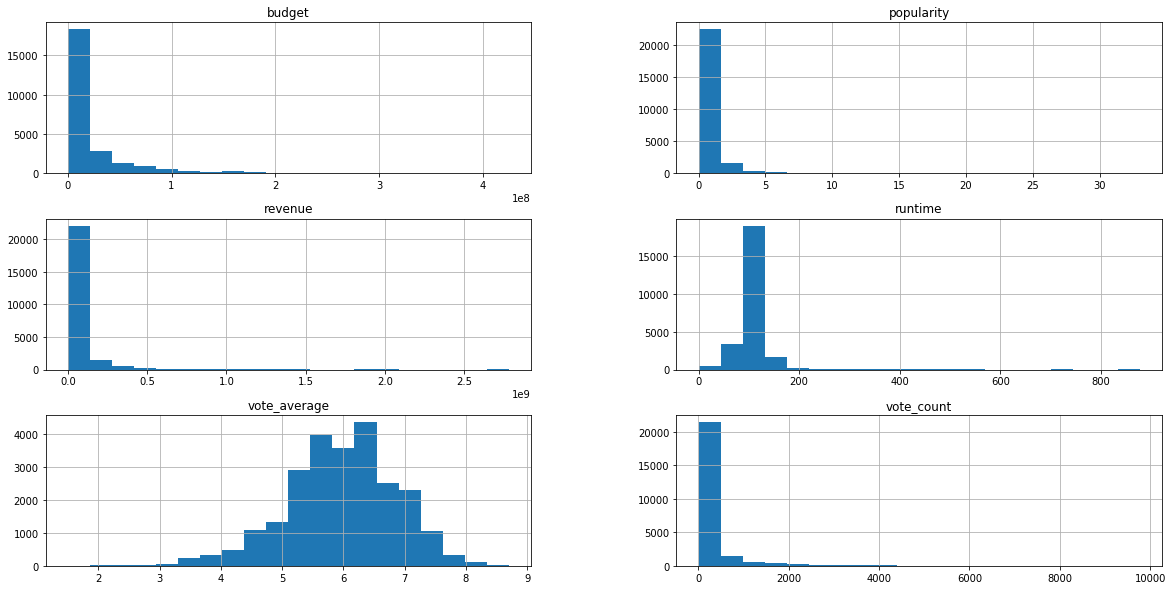

In [52]:
copy_df.hist(figsize=(20,10), bins=20)
plt.show()

### Interpretation of multiple histograms



``1.`` Budgetary allocations are right skewed- we have more movies with below average budgetary allocations


``2.`` Revenue generations are right skewed- we have more movies with below average revenue generations


``3.`` popularity of movies are right skewed - we have more movies with below average popularity

``4.`` runtime of movies are right skewed - we have more movies with below average runtime

``5.``vote_count are right skewed  - we have more movies with below average votes

``6.`` vote average appears to be normally distributed

.

### Further Comprehensive analysis

<a id='r1'></a>
### Research Question 1 ( most popular genres (2010-2015) ?)

##### Step 1: 

> groupby release year & genres

> groupby values should be populated with popularity average of each gennre in individual years

In [53]:
genres_pop =(copy_df.groupby(['release_year', 'genres'])['popularity'].mean())

In [54]:
genres_pop

release_year  genres   
1960          Action       0.590724
              Adventure    0.700981
              Comedy       0.396000
              Crime        0.346480
              Drama        0.566305
                             ...   
2015          TV Movie     0.280440
              Thriller     1.486609
              War          1.438548
              Western      3.178796
              nan          0.129696
Name: popularity, Length: 1051, dtype: float64

#### Step 2: 

> Write a funtion to get the genre with the higest rating in each year

In [55]:
def find_pop_genre(year, dic):
    max_val= 0; max_key=' '
    for k,v in dic.items():
        if v> max_val:
            max_val = v
            max_key = k 
    return f' most popular genre for year {year} is {max_key} genre with rating of {max_val} '

##### 2010

In [56]:
find_pop_genre(2010,genres_pop['2010'].to_dict()) 

' most popular genre for year 2010 is Adventure genre with rating of 1.393733631578947 '

##### 2011

In [57]:
find_pop_genre(2011, genres_pop['2011'].to_dict())

' most popular genre for year 2011 is Adventure genre with rating of 1.1908371578947368 '

##### 2012

In [58]:
find_pop_genre(2012,genres_pop['2012'].to_dict())

' most popular genre for year 2012 is Western genre with rating of 2.242083 '

##### 2013

In [59]:
find_pop_genre(2013,genres_pop['2013'].to_dict())

' most popular genre for year 2013 is Science Fiction genre with rating of 1.4434092745098033 '

##### 2014

In [60]:
find_pop_genre(2014,genres_pop['2014'].to_dict())

' most popular genre for year 2014 is Adventure genre with rating of 2.4643446060606067 '

##### 2015

In [61]:
find_pop_genre(2015,genres_pop['2015'].to_dict())

' most popular genre for year 2015 is Adventure genre with rating of 3.4173727424242424 '

.

### Interpretation

> Adeventure genre movies is the most popular genre from 2010 t0 2015 which means it has also attracted the most rating and possibly most viewership

#### Observation 

>  BUt does this translate to higher revenu generation for adventure genre movies:

>  This  would find be appropraitely answered as we continue with our analysis

.

### Visualization

#### Step 1:
> select past five years from our already grouped data (2010 - 2015)

In [62]:
yrs2010_15 = genres_pop['2010':'2015']

#### Step 2:

> parse grouped data as dataframe 

> reset index

> sort ascending order

> ``NB:``  similiar activity of grouping, DataFrame parsing and sorting in ascending order would be perfomred in future analysis

>> We would be using code: `reg101` to refer to this set of activities

In [63]:
yrs2010_15 = pd.DataFrame(yrs2010_15)
yrs2010_15=yrs2010_15.reset_index()
yrs2010_15= yrs2010_15.sort_values(by='popularity', ascending = False)

In [64]:
yrs2010_15.head()

,release_year,genres,popularity
101,2015,Adventure,3.417373
118,2015,Western,3.178796
82,2014,Adventure,2.464345
95,2014,Science Fiction,2.446727
114,2015,Science Fiction,2.348382


#### Step 3:

> Use count plot from seaborn to visually plot the selected years from grouped data

> `NB:` With countplot, we can combine various data points in categories on our horizontal azis

#####  Define plat general properties

>``NB:`` similiar activity like this where we define plot properties before actual plotting would be performed going forward. 

>> We would be using code: `reg102` to refer to this set of activities

In [65]:
width = 30
height = 10

In [66]:
plt.figure(figsize=(25,16))
sns.set(style="whitegrid")
plt.figure(figsize=(width,height));

<Figure size 1800x1152 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

#### Reference:

> I copied a pallete list from the github repo below

https://github.com/mwaskom/seaborn/blob/master/seaborn/palettes.py

#### Justification

>  Pallete argument tells seaborn to use provided pallete colours for unique colouring of bars in the esh group of the cat plot

> Seaborn default colour pallete is not sufficent for the number of  data points we are visualizing in each group. 

> Using Seaborn default palltes can lead to repetition of bar colors ith the dnager of inappropriate or meaningless visaulization

In [67]:
pallete_list = ["#001C7F", "#B1400D", "#12711C", "#8C0800", "#591E71",
          "#592F0D", "#A23582", "#3C3C3C", "#B8850A", "#006374", "#023EFF", "#FF7C00", "#1AC938", "#E8000B", "#8B2BE2",
           "#4878D0", "#EE854A", "#6ACC64", "#D65F5F", "#956CB4",
#            "#8C613C", "#DC7EC0", "#797979", "#D5BB67", "#82C6E2"
 #           "#9F4800", "#F14CC1", "#A3A3A3", "#FFC400", "#00D7FF"
          "#4C72B0", "#DD8452", "#55A868", "#C44E52", "#8172B3",
          "#937860", "#DA8BC3", "#8C8C8C", "#CCB974", "#64B5CD"]

> actual plotting

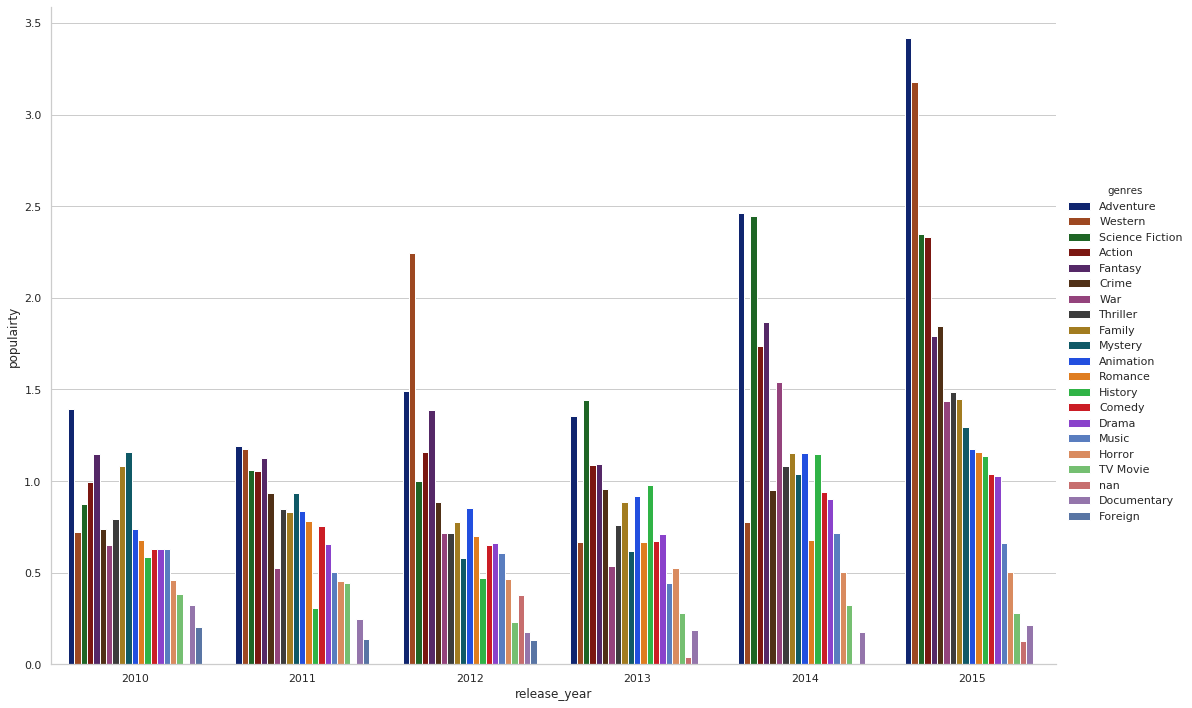

In [68]:
pop_plot = sns.catplot(x="release_year", y="popularity", hue="genres", data=yrs2010_15,
                aspect=1.5, kind='bar',
                height=10, palette=pallete_list)
pop_plot.set_ylabels("populairty");

,

#### The countplot supports the result of our quantitative finding above:

>> Adventure genre movies on the average,  have a record high popularity than others (2010-2015)

.

<a id='r2'></a>
### Research Question 2  (properties associated with high revenue movies?)

In [69]:
copy_df.head(2)

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


#### Step 1:

> Calculate total and average revenue

In [70]:
# we would use unique values in our data to calcualte the sum and mean
revenue_sum = copy_df.revenue.unique().sum() 

In [71]:
revenue_mean= copy_df.revenue.unique().mean() 

f'Average revenue =  ${revenue_mean}'

'Average revenue =  $93044600.76869716'

.

> ``Code:`` reg101

#### Property 1 :genres common with high revenue movies?

> We would group genres by thier revenue over the years from highest to lowest

In [72]:
gnrs_rev = copy_df.groupby('genres')['revenue'].mean().sort_values(ascending = False)

gnrs_rev

genres
Adventure          1.200849e+08
Fantasy            1.048776e+08
Animation          8.276420e+07
Family             8.070636e+07
Action             7.766115e+07
Science Fiction    7.593489e+07
War                4.962703e+07
Crime              4.415599e+07
Thriller           4.411671e+07
Mystery            4.204428e+07
Comedy             4.134420e+07
Romance            3.886724e+07
History            3.470387e+07
Music              3.416027e+07
Drama              3.179121e+07
Western            2.946148e+07
Horror             1.801710e+07
Documentary        3.029630e+06
Foreign            1.482569e+06
TV Movie           3.181818e+05
nan                0.000000e+00
Name: revenue, dtype: float64

##### For visualization purpose, we would only be plotting the bar chart of top 5 genre by revenues

#### Step 1:
>> Select first 5 rows from series -- they are already ordered in descending order

>> Convert selected list of rows to dict to easily access genres (keys) and revenue (values) separately

In [73]:
top5gnrs_by_rev = gnrs_rev[:5].to_dict()
top5gnrs_by_rev

{'Adventure': 120084928.34079422,
 'Fantasy': 104877555.27705114,
 'Animation': 82764203.28818898,
 'Family': 80706356.10788758,
 'Action': 77661149.56515898}

#### Now let's plot 

#### ``*`` Are certain movie genres more profitable than the other

> Define plot properties and plot visual - `code`: reg102

In [74]:
height = top5gnrs_by_rev.values()
x_axis = top5gnrs_by_rev.keys()

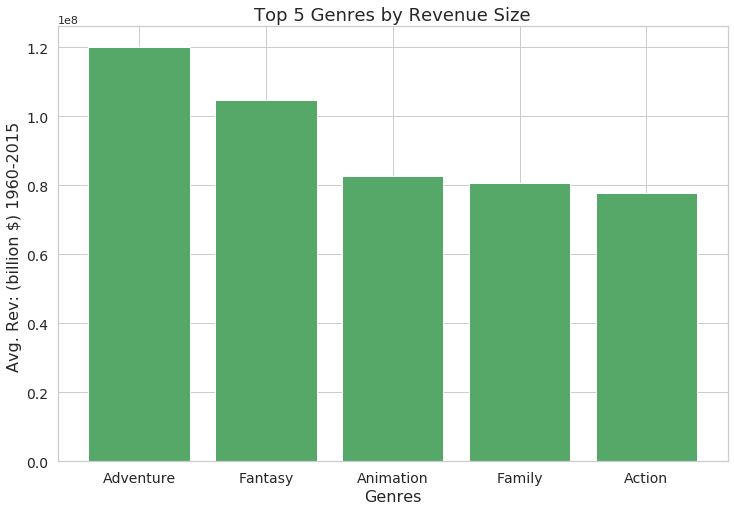

In [75]:
plt.subplots(figsize=(12,8))
plt.xlabel("Genres", fontsize=16)
plt.ylabel('Avg. Rev: (billion $) 1960-2015 ', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)
plt.title("Top 5 Genres by Revenue Size", fontsize=18)
plt.bar(x_axis, height, color='g')
plt.show()

#### Interpretation
> The bar chart reveals that ``Adventure Genre Movies``have  attracted the most Revenue over the years

> This follows the intereprtation of our catplot above where adventute genre movies happens too be the mose popular set of movies

.

#### Property 2 : deos a correlation exists between  movie runtime and revenue?

#### Let's take a look at runtime values of our working data
###### NB: ``Movie Runtime/lemgth is calculated in minutes``

#####  Steps : 

>> 1. filter out movies with zero runtime using pandas  query function 

>> 2. code: reg101

>> 3.  drop movies (rows) that has no revenue record - to enusre accurate analysis

#### 1

In [76]:
runtime = copy_df.query('runtime > 0')

In [77]:
runtime.head(2)

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


#### 2.

In [78]:
runtime_rev = runtime.groupby('runtime')['revenue'].mean().sort_values(ascending = False)

#### 3.

In [79]:
runtime_rev.drop(runtime_rev[runtime_rev == 0].index, inplace=True)

### Visually communicate result

#### Steps: 

>> 1. Convert series values to list for x axis & 
        series index to list for y axis
        
>> 2. `code`: reg102

#### 1.

In [80]:
x = list(runtime_rev.values)
y = list(runtime_rev.index)

#### 2.

> `code:` reg102 - Define properties and plot 

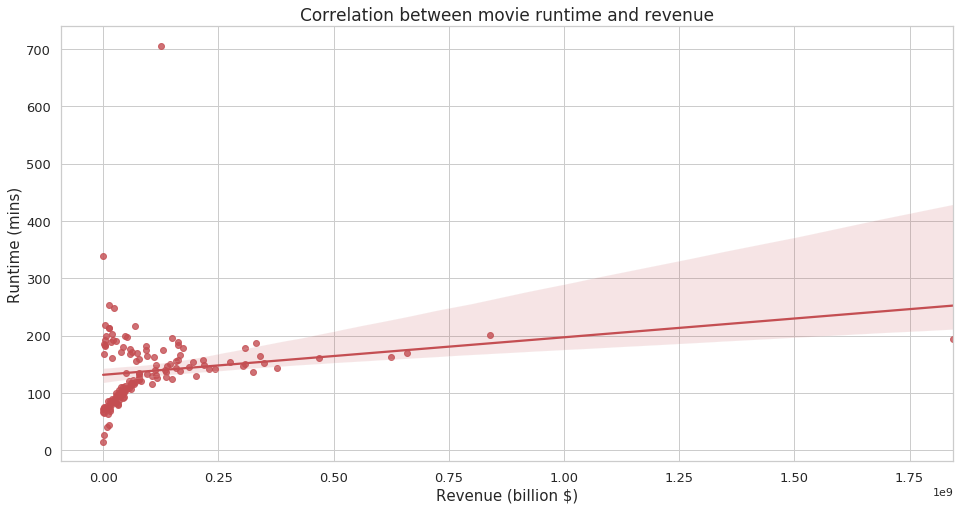

In [81]:
plt.subplots(figsize=(16,8))
sns.regplot(x,y,color='r')
plt.xlabel('Revenue (billion $)', fontsize=15)
plt.ylabel('Runtime (mins)', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Correlation between movie runtime and revenue', fontsize=17)
plt.show()

### Interpretation

> A weak positive correlation exits between runtime and revenue


> To validate our interpretation:

         We would mathematically calculate the correlation between the two data points.
         
         We measure the linear relationship between these two variables using person's correlation from scipy statistics 
         
         We imported this library from the begining of our notebook

In [82]:
corr_val, p_val = pr(x, y) 
corr_val

0.18731541222444534

> >  corr_val is correlation value & p_val is p-value

In [83]:
f'Correlation value is {corr_val}'

'Correlation value is 0.18731541222444534'

> The result of our calculated correlation indicates that there is a weak positive correlation between runtime of movies and and thier revenue

.

#### Analysis 2 - Revenue vs avg Runtime

#### Bar Plot

`Notes`

> To effectively plot bar chart, we have to find a way of interpreting one of the  two quatitaive features (preferably revenue) as a categorical variable 

#### Steps : 

> 1.  Use pandas cut funtion to bin our revenue column into groups (categorical values) and label these groups
            
            first, define the bin edges so we can have categorical labels for our revenue data

            second, bin the revenue data into 3 groups viz: 'low_Revenue', 'avg_revenue', 'high_revenue'

            to achive the second task , we would bin the revenue column into measures of spread from the min to the upper percentile and max
            
> 2. `code`: reg102 - define properties and plot

.

### 1

>  Bin edges

In [84]:
edges = runtime_rev.quantile([0.25,  0.5 , 0.75 , 1])

> Bin Lables

In [85]:
labels = ['low_rev', 'avg_rev', 'high_rev']

##### parse groupby series to new dataframe

In [86]:
df_run_by_rev = pd.DataFrame(runtime_rev).reset_index()

> Use pandas cut funtion to add new columns of catgorical revenue data to the new dataframe

In [87]:
df_run_by_rev ['revenue_type'] = pd.cut(runtime_rev.values, edges, labels=labels, duplicates='drop')

In [88]:
df_run_by_rev

,runtime,revenue,revenue_type
0,194,1.845034e+09,high_rev
1,201,8.391667e+08,high_rev
2,169,6.603422e+08,high_rev
3,162,6.249902e+08,high_rev
4,161,4.676873e+08,high_rev
...,...,...,...
137,75,9.805423e+05,NaN
138,338,8.712790e+05,NaN
139,71,5.330997e+05,NaN
140,66,1.107743e+05,NaN


In [89]:
df_run_by_rev.revenue_type=df_run_by_rev.revenue_type.astype(str)

##### drop NAN rows

In [90]:
df_run_by_rev.drop(df_run_by_rev[df_run_by_rev['revenue_type'] == 'nan'].index, inplace=True)

##### are there duplicates

In [91]:
df_run_by_rev.duplicated().any()

False

### 2.

#### Visually present data, - bar plaot

> groupby, sort descending and passing to dataframe operations

In [92]:
runtime_hist_plot = df_run_by_rev.groupby('revenue_type')['runtime'].mean().reset_index().sort_values(by ='runtime',ascending=False)

In [93]:
runtime_hist_plot

,revenue_type,runtime
0,avg_rev,157.057143
1,high_rev,156.861111
2,low_rev,118.771429


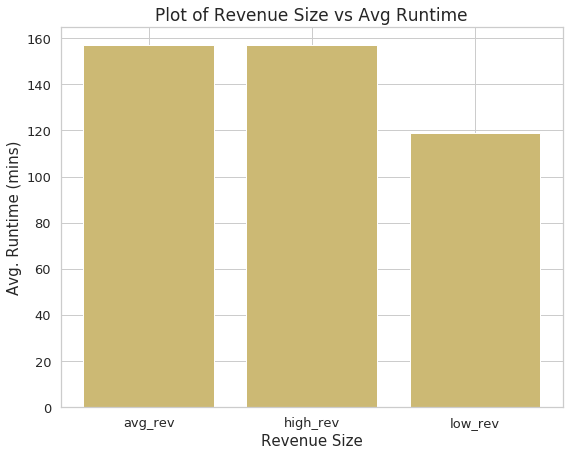

In [94]:
plt.subplots(figsize=(9,7))
plt.bar(x='revenue_type', height='runtime', data=runtime_hist_plot, color='y')

# define properties of the plot
plt.xlabel('Revenue Size',fontsize=15)
plt.ylabel('Avg. Runtime (mins)',fontsize=15)
plt.title('Plot of Revenue Size vs Avg Runtime', fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

#### Interpretations

> Movies with high revenue on the average have longer view time/runtime.
> This is followed by moviews with mid sized revenue.
> And movies with low revenue have the lowest runtime

.

<a id='r3'></a>

### Research Question 3 (correlation between movie's budget and revenue?)

### Steps: 
> 1. `code:` reg101
> 2. Plot regression plot of series from setep 1 above

### 1.

##### group revenue mean by budget, sort values descending

In [95]:
bdgt_grp = copy_df.groupby('budget')['revenue'].mean().sort_values(ascending = False)

####  drop movies with no revenue record for accurate analysis

In [96]:
bdgt_grp.drop(bdgt_grp[bdgt_grp == 0].index, inplace=True)

> Confirm there are no more zero values

In [97]:
bdgt_grp[bdgt_grp == 0].any()

False

### 2

#### Visually plot correlation of revenue vs budget

#### Steps: 

>1. Assign series values and series index values to variables for x and y parameters the scatter plot

>2. Use the seaborn regplot for visualization

In [98]:
rev_cor = bdgt_grp
bdgt_cor = bdgt_grp.index

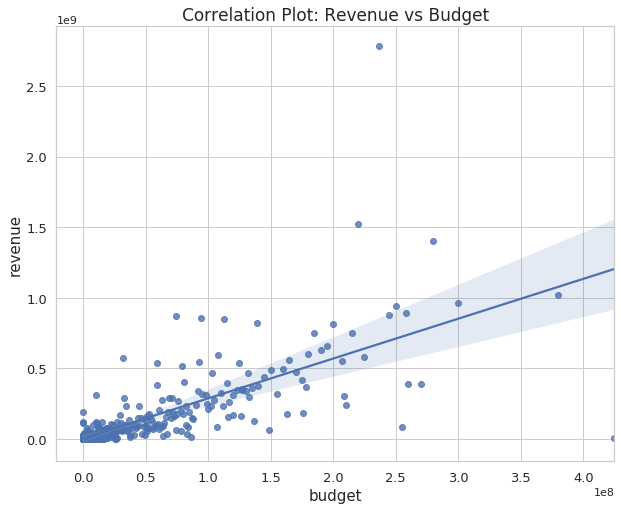

In [99]:
## define custome plot properties
plt.subplots(figsize=(10,8))
plt.xlabel('revenue',fontsize=15)
plt.ylabel('budget',fontsize=15)
plt.title('Correlation Plot: Revenue vs Budget', fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


sns.regplot(y=rev_cor, x=bdgt_cor, color='b')
plt.show()

### Interpretation

> There is a ``strong positive correlation`` between budget & revenue

### Verify
>  We would mathematicallly calculate the correlation value between budget and revenue using scipy stats library imported from the beginning to validate our interpretation

In [100]:
corr_val2, p_val2 = pr(rev_cor, bdgt_cor)
f'The correlation between revenue vs budget is {corr_val2}'

'The correlation between revenue vs budget is 0.7317483523103689'

> The caclulated correlaion figure is above (0.5)

> This validates our interepretation of a strong correlation between revenue and budget

.

<a id='r4'></a>
### Research Question 4 ( which movie genres attract more votes?)

### Steps:

>1. `code:`reg102 - grouping vote_count by genres and sorting values descending

>2. visually plot grouped series


##### 1

In [106]:
gnr_votes = copy_df.groupby('genres')['vote_count'].mean().sort_values(ascending = False)

> Descending order of genres by thier vote counts over the years

In [107]:
gnr_votes

genres
Adventure          543.310469
Science Fiction    471.468722
Fantasy            455.965517
Action             417.983430
Animation          331.000000
Family             301.081596
Crime              289.638953
War                281.563707
Thriller           269.223881
Mystery            247.304010
Western            211.737500
History            197.720779
Drama              196.991073
Comedy             192.418266
Romance            179.086624
Music              144.378299
Horror             127.462647
Documentary         43.637462
TV Movie            38.477273
nan                 17.750000
Foreign             17.266667
Name: vote_count, dtype: float64

#### 2.

#### Visually communicate

> Use seaborn barplo 

> specify bar colours with pallete list

>> define barplot parameters

In [118]:
height= gnr_votes
x = gnr_votes.index

palette_list = [
     "#D65F5F", "#956CB4", "#592F0D",
         "#023EFF", "#FF7C00", "#1AC938", "#E8000B", "#8B2BE2",
           "#4878D0", "#EE854A","#001C7F", "#B1400D", "#12711C", "#8C0800", "#591E71", 
    "#6ACC64", "#A23582", "#3C3C3C", "#B8850A", "#006374", ]

>> plot

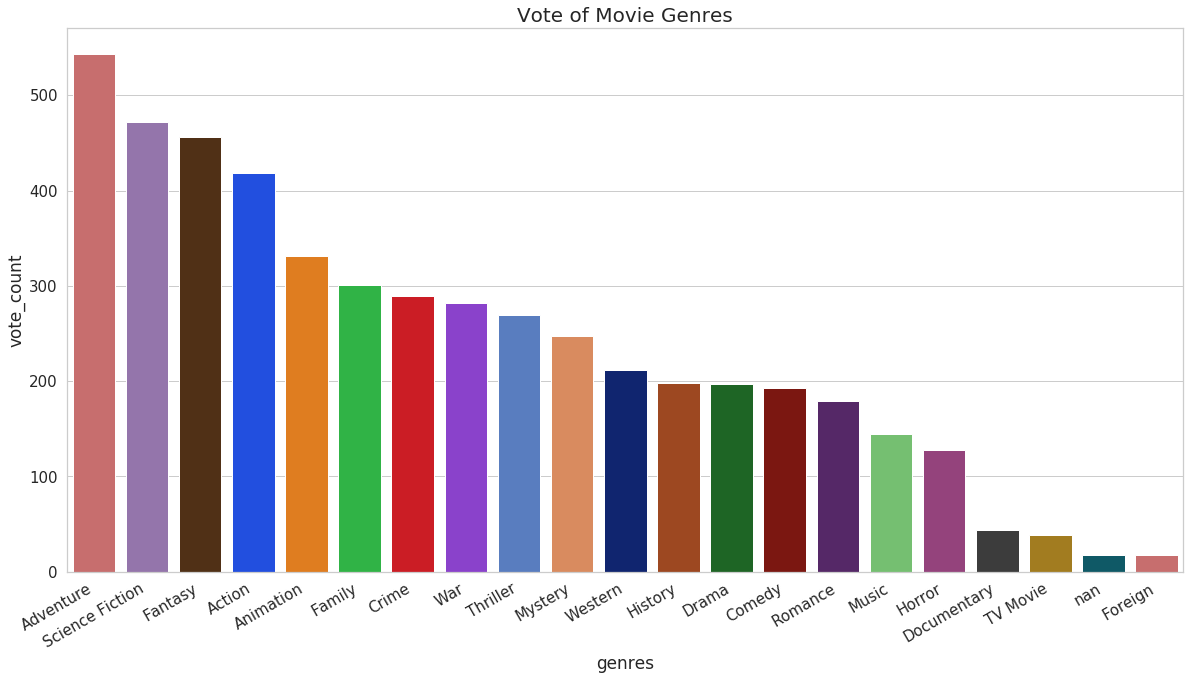

In [125]:
# define properties
plt.subplots(figsize=(20,10))
plt.title('Vote of Movie Genres', fontsize=20)
plt.xlabel('Genres', fontsize=17)
plt.ylabel('Votes', fontsize=17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


# plot bar chaart
gnr_vote_plt= sns.barplot(x, height, palette= palette_list)
gnr_vote_plt.set_xticklabels(gnr_vote_plt.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

#### Interpretation: 

>  ``Adventure Genres`` has had the highest vote over the years

> This confrims a consistency in positive performance of movies in adventure genres in terms of popularity, votes, and revenue

.

#### Observation 1: 

``*``  deventure genre have the most popular movies

``*``  deventure genre have the most voted movies

``*``  deventure genre movies have the highest revenue

.

#### Observation 2:

> 4 out of the top 5 genres by revenue size happen to also be the top 4 genres by vote counts

.

#### Validate:

> We can validate this programmatically using the steps below:

>>1. get lsit of top 5 genres from both series and then convert to a set

>>2. using set instersect function, we can obtain values common to both sets

#### 1.

In [109]:
top5gnrs_by_rev = set(top5gnrs_by_rev.keys())
top5gnrs_by_rev

{'Action', 'Adventure', 'Animation', 'Family', 'Fantasy'}

In [126]:
top5gnrs_by_vote = set(gnr_votes[:5].to_dict().keys())
top5gnrs_by_vote

{'Action', 'Adventure', 'Animation', 'Fantasy', 'Science Fiction'}

In [128]:
top_gnrs = top5gnrs_by_rev.intersection(top5gnrs_by_vote)

> top genres by votes & revenue

In [133]:
top_gnrs

{'Action', 'Adventure', 'Animation', 'Fantasy'}

##### Interpretation:

> Top 4 genres by vote counts are also the top 4 genre by revenue size

##### Observation:

> could there be a correlation between revenue and vote_count? 

> This can form the basis of another Research Question, Research Question 5 

.

<a id='r5'></a>
### Research Question 5 ( Correlation between revenue and vote count?)

### Steps: 
>1a : `code:` reg101 - group vote_count by revenue avergae, sort descending

       1b drop rows where revenue average = 0
        
>2: `code:` reg102 - visualize using seaborn regplot

#### 1a.

In [134]:
rev_votes = copy_df.groupby('vote_count')['revenue'].mean().sort_values(ascending = False)

#### 1b.

In [135]:
rev_votes.drop(rev_votes[rev_votes == 0].index, inplace=True)

> confirm no more rows where revenue average = 0 

In [136]:
rev_votes[rev_votes == 0].any()

False

#### 2.

> define x and y parameters

In [137]:
rev_cor2 = rev_votes 
vote_cor2 = rev_votes.index

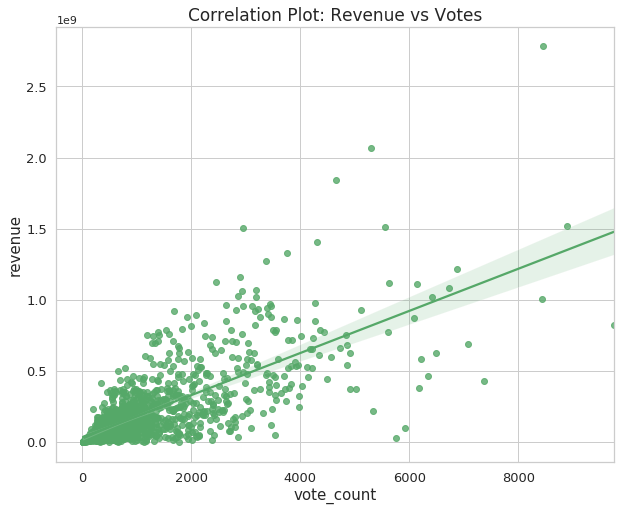

In [141]:
## define properties
plt.subplots(figsize=(10,8))
plt.xlabel('vote_count',fontsize=15)
plt.ylabel('budget',fontsize=15)
plt.title('Correlation Plot: Revenue vs Votes', fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# plot
sns.regplot(y=rev_cor2, x=vote_cor2, color='g')
plt.show()

##### Interpretation:

> A _strong positive correlation_ exists between revenue and votes

#### Validate: 
> calculate the correlation using pearson function from scipy.stats 

In [144]:
cor, pv = pr(rev_cor2, vote_cor2)

In [145]:
cor

0.7322074339259488

#### Interpretation: 

> correlation point is grreater than 0.5 

> A _strong positive_ correlation between movie votes and movie reevenues

.

<a id='limit'></a>
## Anaalysis Limitations/Challenges

#####  Challenges &  limitaions experienced during this analysis:

> 1. Over 2000 movies and revenue budget were not recorded. This is significant becuase o=most of research questions are quantitative in nature and required data of movie revenues and budget


> 2. Missing values and NaN rows proved more tricky to deal with than expected

>3. Filling missing quantittative values with avereg of values in the column as is done in most analytical cases proved impossible here, becuae the movie records are independent and this could affect the acuuracy of the anlysis

> A significant negative outcomes of filling quantitative missing values with mean of reported values include:

        1. offset of actual mean values 
        2. inaccurate statistical values
        3. inaccurate  correlation/regression analysis 

<a id='conclusions'></a>
## Analysis Conclusions

<!-- > **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations! -->

### Steps:

#### 1. Data Asseesment & Cleaning

##### Assessment
> Load data from downloaded file;

> Reset index as id column;

> Dropped columns not relevant for analysis e,g,  homepage column, overview column, tagline column;

> Performed assessment of data doing the ffg : 
                  
        finding the data shape , info, null values, duplicate values, & data types,

##### Cleaning
> Dropped duplicate rows `NB:`(only one existed);

> Splitted genres columns joined by '|' into rows using sstring split and pands explode function

> Confirmed once again if  data i tidy and clean enough for analysis         

.

#### 2. Data Exploration & Visualization

##### Descriptive Staitstics

> Used pandas describe fcution to get all avaialable statistical values on quantitive features of the data
> Performed individual statistics on sleected features significant in answering some of the research questions 
                
                such features include: budget, revenues and runtime

> PLotted multiple histograms for these qunatitive features

           I discovered from the charts that most of these quantitaitve features are right skewed
           
           this gave me an intuition on what to expect in further analysis
           i.e only few movies are above averge in each quantitative varibales
                

.

#####  Research Question 1 ( most popular genres (2010-2015) ?)

> Grouped release year and genre by thier average popularity

> Using a defined function, I was able to extract the most popular genre of a particular year

> Usin seaborn catplot funtion, I plotted the popularity of genres from 2010-2015

.


##### Research Question 2  (properties associated with high revenue movies?)

> 

##### Property 1 : genres associated with high revenue movies

> Grouped revenue mean values  by genres and sort descending

> Extracted top 5 profitable genres using the series.to_dict() and list function

> Using matplotlib, plotted barchart to visualize top 5 profitable genres

#####  

##### Property 2 : Correlation between movie runtime & revenue?

> Used pandas query function to get rows where runtime is less than or equal 0

> Groupped revenue mean values by runtime and  sorted descending

> Dropped rows that has no revenue record. 

> Using pandas cut funtion, binned revenue column into catogircal labels to be able to  plot revenue vs runtime on bar chart

.

#####  Research Question 3 (Correlation between a movie's budget & revenue ?)

> Grouped mean revenues by budget and sorted in descending order

> Dropped rows where there is no revenue records

> Using regplot from seaborn plotted a correlation plot between budget & revenue


.

##### Research Question 4 (which movie genres attract more votes ?)

> Grouped average vote counts by genres, and sorted descending

> Using seaborn barplot plotted vote of movie genres ans used s third party pallete list for bar colouring

.

##### Research Question 5 (Correlation between revenue & vote count ?)

> Grouped revenue mean values by vote counts

> Dropped rows that has no record of revenue

> Using seaborn regplot, plot correlation plot of revenue and vote counts

.

#### Reearch Answers and Analysis Submission

> Adventure genre movies beats other genre movies in popularity, revenue and vote counts

> The following genres are the most profitable and most voted:

    ('Animation', 'Action', 'Fantasy', 'Adventure')

> A weak positive corrrelation exists between movies' runtime & revenue where correlaion = 0.1873

> MOvies with higher revenue have higher runtime as indicated by the barchart to display movie revnue ctagoriees by thier runtime

> A strong positive correlation exists between budget & revenue where correlaion = 0.7317

> A strong postive correlation exists between budget & vote count where correlaion = 0.7322

.

> Prodcue copy in html

<!-- ## Submitting your Project

Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. 

To do that, run the code cell below.

If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

Alternatively, you can download this report as .html via the File > Download as submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. 

This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations! -->

In [146]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'IMDB movie data analysis.ipynb'])

0